<a href="https://colab.research.google.com/github/Regnumpro/Alura_Store_Challenge1/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [7]:
import pandas as pd

# ... (código para cargar los datos) ...

facturacion_tienda = tienda['Precio'].sum()
facturacion_tienda2 = tienda2['Precio'].sum()
facturacion_tienda3 = tienda3['Precio'].sum()
facturacion_tienda4 = tienda4['Precio'].sum()

print("Facturación Tienda : {:,.0f}".format(facturacion_tienda))
print("Facturación Tienda 2: {:,.0f}".format(facturacion_tienda2))
print("Facturación Tienda 3: {:,.0f}".format(facturacion_tienda3))
print("Facturación Tienda 4: {:,.0f}".format(facturacion_tienda4))

Facturación Tienda : 1,150,880,400
Facturación Tienda 2: 1,116,343,500
Facturación Tienda 3: 1,098,019,600
Facturación Tienda 4: 1,038,375,700


In [9]:
todos_los_locales = todas_las_tiendas['Lugar de Compra'].unique()

In [14]:
import pandas as pd

# Agrupar por "Lugar de Compra" y luego por "Tienda"
facturacion_por_lugar_y_tienda = todas_las_tiendas.groupby(['Lugar de Compra', 'Tienda'])['Precio'].sum()

# Crear una tabla con todas las combinaciones de lugar de compra y tienda
tabla_facturacion = facturacion_por_lugar_y_tienda.unstack(fill_value=0)

# Imprimir la tabla
print(tabla_facturacion)

Tienda              Tienda 1     Tienda 2     Tienda 3     Tienda 4
Lugar de Compra                                                    
Armenia            4615700.0    3363200.0    3980300.0     283700.0
Barranquilla      32907700.0   27741300.0   36768500.0   34623000.0
Bogotá           440005000.0  479959200.0  475562100.0  419332000.0
Bucaramanga       17579200.0   23895600.0   23538900.0   25559600.0
Cali             154493700.0  118257600.0  109287600.0  124487200.0
Cartagena         22296700.0   21548300.0   34144100.0   24387600.0
Cúcuta            37879500.0   28991500.0   25165500.0    7332600.0
Inírida            2722500.0    2504600.0    1333700.0    1527100.0
Leticia           14669800.0   16159000.0   19212800.0   17108300.0
Manizales          8027600.0    3539900.0    6501800.0    1298600.0
Medellín         296858100.0  297246700.0  250580600.0  251983800.0
Neiva              3494000.0    3839400.0    4359500.0    9205100.0
Pasto             14996400.0   12800100.0    680

In [15]:
import pandas as pd

# ... (código para cargar los datos y agregar la columna "Tienda") ...

# Agrupar por "Tienda" y calcular la facturación total y la cantidad de compras
facturacion_y_compras = todas_las_tiendas.groupby('Tienda').agg(
    Facturacion_Total=('Precio', 'sum'),
    Cantidad_Compras=('Precio', 'count')  # Asumiendo que cada fila representa una compra
)

# Calcular el promedio de facturación por compra
facturacion_y_compras['Promedio_Facturacion'] = facturacion_y_compras['Facturacion_Total'] / facturacion_y_compras['Cantidad_Compras']

# Mostrar los resultados
print(facturacion_y_compras)

          Facturacion_Total  Cantidad_Compras  Promedio_Facturacion
Tienda                                                             
Tienda 1       1.150880e+09              2359         487867.910131
Tienda 2       1.116344e+09              2359         473227.426876
Tienda 3       1.098020e+09              2359         465459.771089
Tienda 4       1.038376e+09              2358         440362.892282


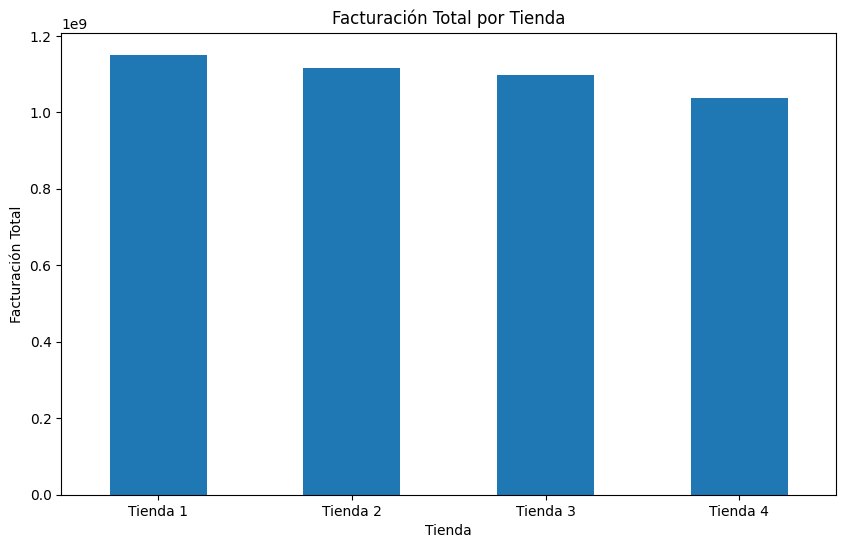

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (código para cargar los datos, agregar la columna "Tienda" y calcular facturación_y_compras) ...

# Crear el gráfico de barras
facturacion_y_compras['Facturacion_Total'].plot(kind='bar', figsize=(10, 6))

# Personalizar el gráfico
plt.title('Facturación Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación Total')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x si es necesario

# Mostrar el gráfico
plt.show()

# 2. Ventas por categoría

In [18]:
import pandas as pd

# ... (código para cargar los datos en todas_las_tiendas) ...

# Agrupar por "Tienda" y "Categoría del Producto" y sumar "Precio"
ventas_por_tienda_y_categoria = todas_las_tiendas.groupby(['Tienda', 'Categoría del Producto'])['Precio'].sum()

# Aplicar formato con separador de miles
ventas_por_tienda_y_categoria_formateada = ventas_por_tienda_y_categoria.apply(lambda x: "{:,.0f}".format(x))

# Mostrar los resultados
print(ventas_por_tienda_y_categoria_formateada)

Tienda    Categoría del Producto 
Tienda 1  Artículos para el hogar     12,698,400
          Deportes y diversión        39,290,000
          Electrodomésticos          363,685,200
          Electrónicos               429,493,500
          Instrumentos musicales      91,299,000
          Juguetes                    17,995,700
          Libros                       8,784,900
          Muebles                    187,633,700
Tienda 2  Artículos para el hogar     14,746,900
          Deportes y diversión        34,744,500
          Electrodomésticos          348,567,800
          Electrónicos               410,831,100
          Instrumentos musicales     104,990,300
          Juguetes                    15,945,400
          Libros                      10,091,200
          Muebles                    176,426,300
Tienda 3  Artículos para el hogar     15,060,000
          Deportes y diversión        35,593,100
          Electrodomésticos          329,237,900
          Electrónicos             

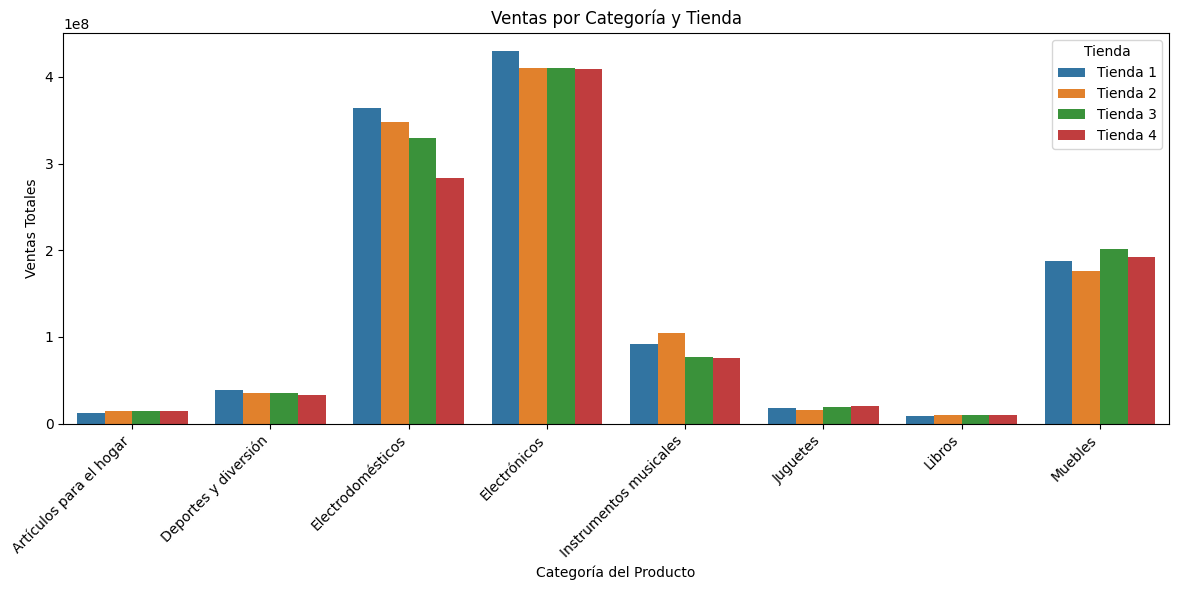

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ... (código anterior para calcular ventas_por_tienda_y_categoria_formateada) ...

# Convertir a numérico (eliminando separadores de miles)
ventas_por_tienda_y_categoria = pd.to_numeric(ventas_por_tienda_y_categoria_formateada.str.replace(',', ''))

# Resetear índice para usar seaborn
ventas_df = ventas_por_tienda_y_categoria.reset_index()

# Crear gráfico de barras
plt.figure(figsize=(12, 6))  # Ajustar tamaño de la figura
sns.barplot(x='Categoría del Producto', y='Precio', hue='Tienda', data=ventas_df)
plt.title('Ventas por Categoría y Tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda